# Support Vector Machines

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [ ]:
# el describir un modelo, la distribución que sigue un modelo para cada una de las clases que pueda existir dentro de la distribución, es una de las tareas básicas de un analista. 
# ya hemos visto que utilizar la regresion, arboles.....son diferentes formas para hacer clasificaciones.
# un ejemplo de problema de clasificaión podría ser cuando tenemos uan serie de puntos que se supone que estan bien separados.

In [11]:
from sklearn.datasets import make_blobs     # lo que pone en el notebook del profesor ya está desfasado

In [16]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)    #make blobs = hacer burbujas; center = como si hubiera dos centros; ojo, la Y es la clasificación

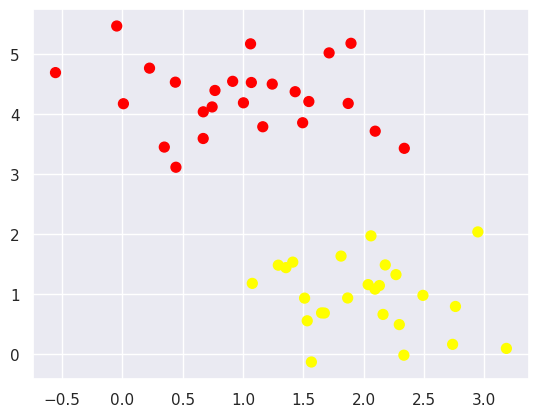

In [17]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")

######inciso

In [20]:
A, B = make_blobs(n_samples=50, centers=4, random_state=0, cluster_std=0.6)     # Pongo más centers para que saque distribuciones de puntos separados según el numero de centers

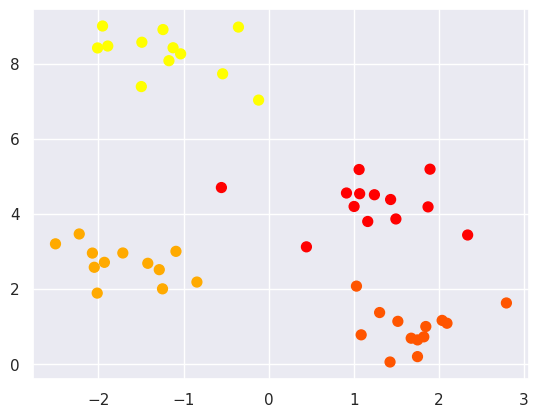

In [21]:
plt.scatter(A[:,0], A[:,1], c = B, s = 50, cmap="autumn")

#####fin inciso

In [ ]:
# buscamos la recta

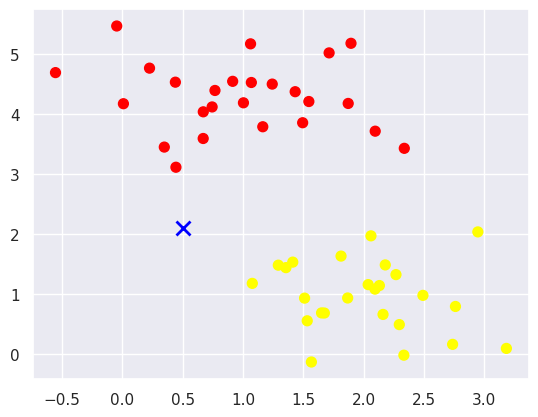

In [22]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)     #añado un punto (X) que sea dificil de clasificar porque quede en medio de los dos grupos de puntos

In [ ]:
# dónde cae la X??? arriba o abajo???

In [ ]:
# vamos a hacer las rectas a mano para demostrar que podría caer arriba o abajo dependiendo de quien haga las rectas:

(-1.0, 3.5)

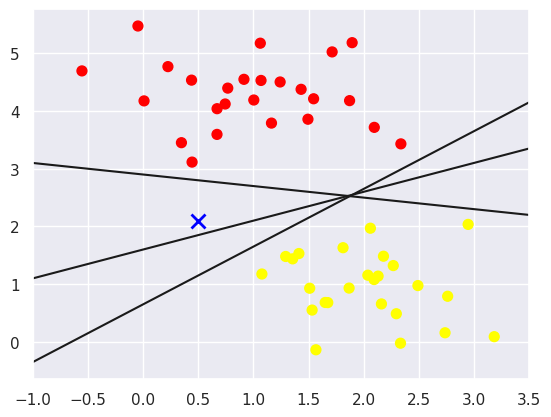

In [23]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

In [ ]:
# vemos que dependiendo de la recta, el punto pertenece al grupo rojo o azul

In [ ]:
# ¿entonces cual es la buena? o a lo mejor es otra....
# lo soluciona el SVM:

In [ ]:
# la idea es hacer un pasillo lo mas ancho posible hasta que nos encontremos con un punto:

## Maximización del margen

In [ ]:
# representamos ese pasillo para cada recta que hemos creado nosotros

(-1.0, 3.5)

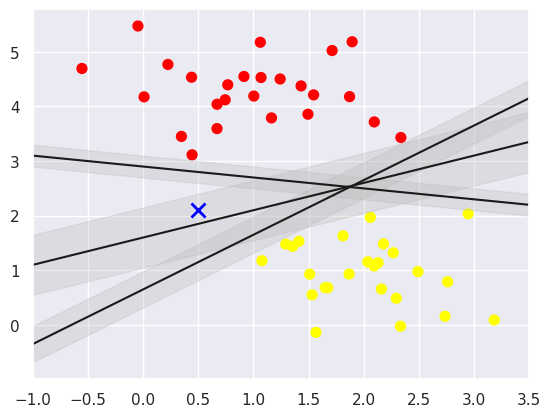

In [25]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#BBBBBB", alpha = 0.3)
    
plt.xlim(-1,3.5)

## Creación del modelo SVM

In [26]:
from sklearn.svm import SVC

In [28]:
model=SVC(kernel="linear", C = 1E10)   # la C es dificil de saber cuánto es.....probamos con un C muy muy alto
model.fit(X,Y)      # y es la clase

SVC(C=10000000000.0, kernel='linear')

In [35]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=200, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


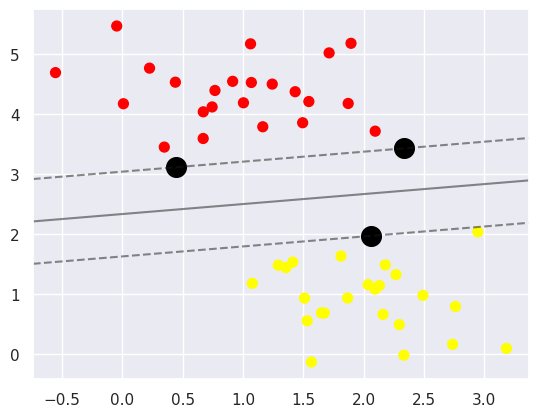

In [36]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [ ]:
# los puntos negros son los puntos de pivote a traves del cual el algoritmo hace la clasificación
# cualquier punto que esté más alla de la recta soporte, se puede clasificar perfectamente.


In [37]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


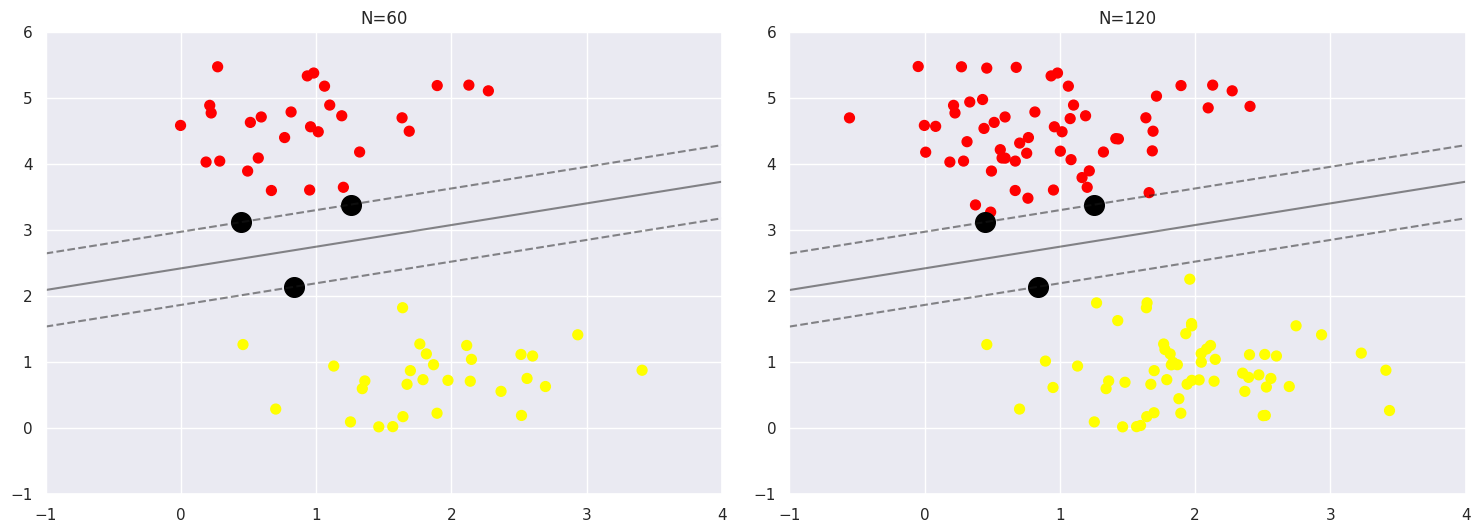

In [38]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [39]:
from ipywidgets import interact, fixed

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 150, 200), value=10), Output()), _dom_cl…

<function __main__.plot_svm(N=10, ax=None)>

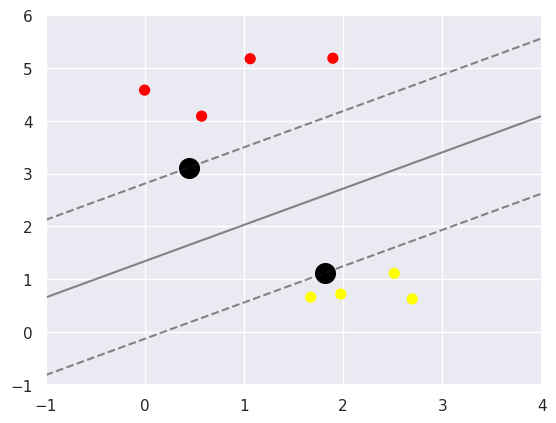

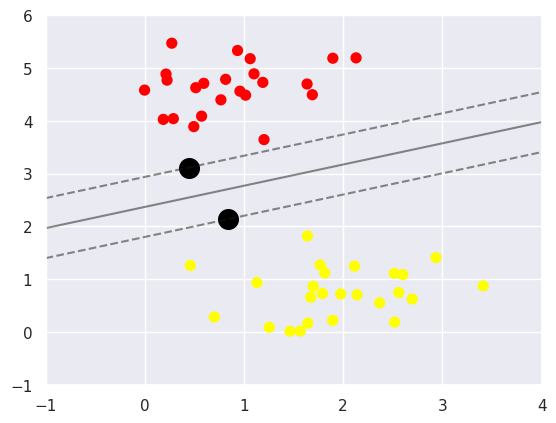

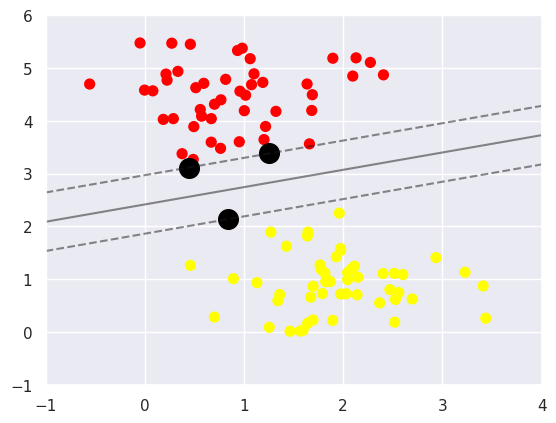

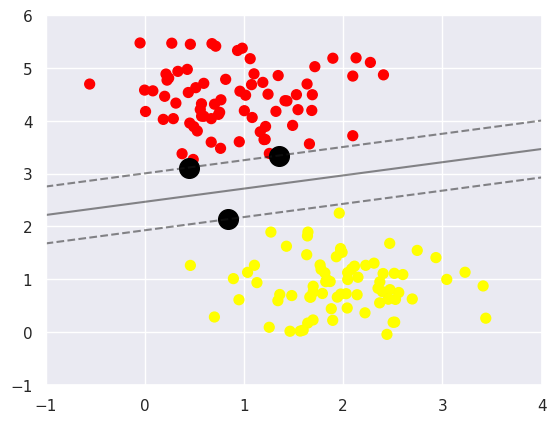

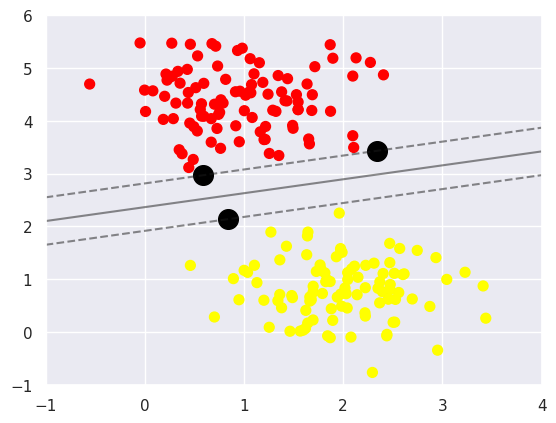

In [42]:
interact(plot_svm, N=[10, 50, 100, 150, 200], ax=fixed(None))